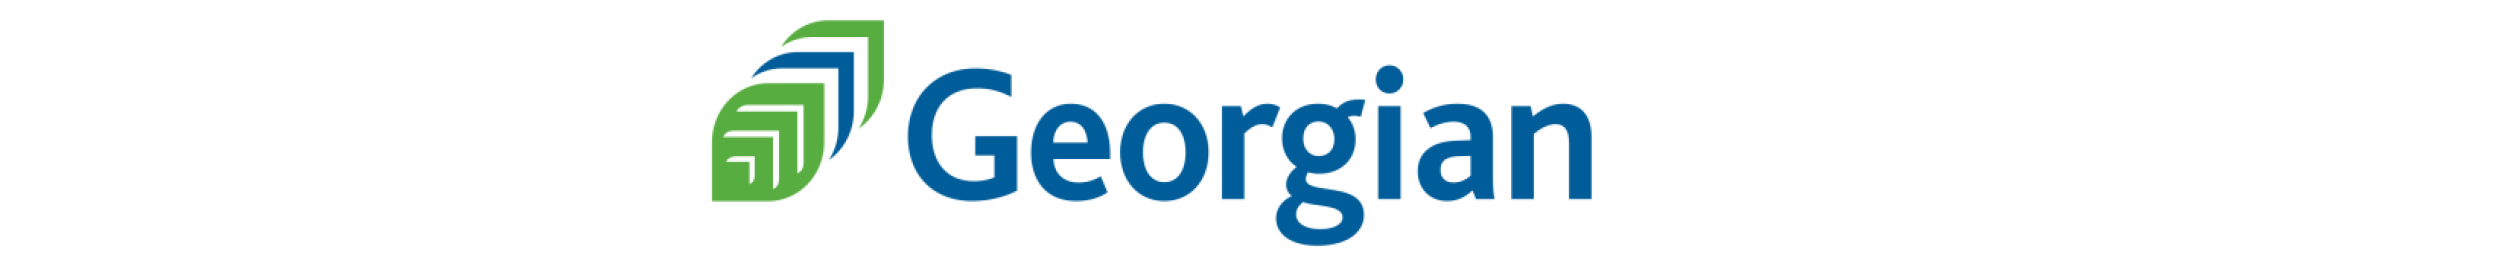
# BDAT 1004 – Data Programming - Problem Set 3

#### Instructor: Professor Ethan Davis
Student Name: Yi-Chen Hsiao


## Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

#### Occupations
> Step 1. Import the necessary libraries <br>
> Step 2. Import the dataset from this  address(https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user).<br>
> Step 3. Assign it to a variable called users<br>
> Step 4. Discover what is the mean age per occupation<br>
> Step 5. Discover the Male ratio per occupation and sort it from the most to the least<br>
> Step 6. For each occupation, calculate the minimum and maximum ages<br>
> Step 7. For each combination of occupation and sex, calculate the mean age<br>
> Step 8. For each occupation present the percentage of women and men<br>

## Answer 1

#### Step 1 - 3 Import data from the designated address and assign it to a variable called 'users'

In [108]:
import pandas as pd

#import data from the designated address and assign it to a variable called 'users'
#the original data is separated by '|'
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')


users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Step 4 Discover what is the mean age per occupation

In [109]:
#Compute average age by occupation
users_4 = users.groupby('occupation').mean()
users_4['mean_age'] = users_4['age']

#Drop irrelevant column
users_4 = users_4.drop(columns=['user_id','age'])

users_4.head()

,mean_age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060


#### Step 5 Discover the Male ratio per occupation and sort it from the most to the least

In [110]:
#Create dummy variables for gender

users_5 = users

users_5['Male'] = users['gender'].apply(lambda x:1 if x =='M' else 0)
users_5['Female'] = users['gender'].apply(lambda x:1 if x =='F' else 0)

users_5.head()

,user_id,age,gender,occupation,zip_code,Male,Female
0,1,24,M,technician,85711,1,0
1,2,53,F,other,94043,0,1
2,3,23,M,writer,32067,1,0
3,4,24,M,technician,43537,1,0
4,5,33,F,other,15213,0,1


In [111]:
#Use 'sum()' to calculate the number of each gender by 'occupation'
users_5 = users_5.groupby('occupation').sum()

#Calculate 'Male_Ratio' using 'Male' and 'Female' columns
users_5['Male_Ratio']= users_5['Male']/users_5['Female']

#Drop irrelevant columns
users_5 = users_5.drop(columns=['user_id', 'age'])

#Sort data by 'Male_Ratio' Descendingly
users_5 = users_5.sort_values(by=['Male_Ratio'], ascending=False)

users_5

,Male,Female,Male_Ratio
occupation,,,
doctor,7,0,inf
engineer,65,2,32.500000
technician,26,1,26.000000
retired,13,1,13.000000
programmer,60,6,10.000000
executive,29,3,9.666667
scientist,28,3,9.333333
entertainment,16,2,8.000000
lawyer,10,2,5.000000


#### Step 6 For each occupation, calculate the minimum and maximum ages

In [112]:
#Drop irrelevant columns
users_6 = users.drop(columns=['user_id', 'gender', 'zip_code', 'Male', 'Female'])

#Calculate the min and max ages by occupation
users_6 = users_6.groupby('occupation').agg(['min','max'])

users_6.head()

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70

#### Step 7 For each combination of occupation and sex, calculate the mean age

In [102]:
#Compute average age by occupation and gender
users_7 = users.groupby(['occupation','gender']).mean()
users_7['mean_age'] = users_7['age']

#Drop irrelevant columns
users_7 = users_7.drop(columns=['user_id', 'Male', 'Female','age'])

users_7.head()

mean_age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429

#### Step 8. For each occupation present the percentage of women and men

In [103]:
# Use the 'users_5' dataframe that was created in step 5 
#'users_5' includes the number of male and female by occupation

users_5['Male%'] = (users_5['Male']/(users_5['Male']+users_5['Female']))*100
users_5['Female%'] = (users_5['Female']/(users_5['Male']+users_5['Female']))*100

#Drop irrelevant columns
users_8 = users_5.drop(columns='Male_Ratio')

users_8.head()

,Male,Female,Male%,Female%
occupation,,,,
doctor,7,0,100.000000,0.000000
engineer,65,2,97.014925,2.985075
technician,26,1,96.296296,3.703704
retired,13,1,92.857143,7.142857
programmer,60,6,90.909091,9.090909


## Question 2

#### Euro Teams
> Step 1. Import the necessary libraries<br>
> Step 2. Import the dataset from this address(https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv)<br>
> Step 3. Assign it to a variable called euro12<br>
> Step 4. Select only the Goal column<br>
> Step 5. How many team participated in the Euro2012?<br>
> Step 6. What is the number of columns in the dataset?<br>
> Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline<br>
> Step 8. Sort the teams by Red Cards, then to Yellow Cards<br>
> Step 9. Calculate the mean Yellow Cards given per Team<br>
> Step 10. Filter teams that scored more than 6 goals<br>
> Step 11. Select the teams that start with G<br>
> Step 12. Select the first 7 columns<br>
> Step 13. Select all columns except the last 3<br>
> Step 14. Present only the Shooting Accuracy from England, Italy and Russia<br>

## Answer 2

#### Step 1 -3 Import data from the designated address and assign it to a variable called 'euro12'

In [1]:
import pandas as pd

#import data from the designated address and assign it to a variable called 'euro12'
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')


euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### Step 4. Select only the Goal column

In [49]:
euro12_4 = euro12['Goals']

euro12_4

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step 5. How many team participated in the Euro2012?

In [3]:
#number of teams = number unique value of 'Team' in 'euro12'

euro12['Team'].nunique()

16

#### Step 6. What is the number of columns in the dataset?

In [37]:
count_column = euro12.shape[1]  #set the parameter inside 'shape' as '1' to count the number of columns
                                # set as '0' to count the number of index

count_column

35

#### Step 7 - 8. 
- View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
- Sort the teams by Red Cards, then to Yellow Cards

In [10]:
#Select 'Team', 'Yellow Cards' and 'Red Cards' columns and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

#Sort the teams by Red Cards, then to Yellow Cards
discipline = discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=False)

discipline

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


#### Step 9. Calculate the mean Yellow Cards given per Team

In [12]:
#Compute average number of Yellow Cards by Team
euro12_9 = euro12[['Team','Yellow Cards']]

euro12_9.groupby('Team').mean()

euro12_9

,Team,Yellow Cards
0,Croatia,9
1,Czech Republic,7
2,Denmark,4
3,England,5
4,France,6
5,Germany,4
6,Greece,9
7,Italy,16
8,Netherlands,5
9,Poland,7


#### Step 10. Filter teams that scored more than 6 goals

In [18]:
#Select relevant columns
euro12_10 = euro12[['Team','Goals']]

#Filter teams by value of 'Goals' (when Goals > 6)
euro12_10 = euro12_10.loc[euro12_10['Goals'] > 6]

euro12_10

,Team,Goals
5,Germany,10
13,Spain,12


#### Step 11. Select the teams that start with G

In [31]:
#Filter teams by value of 'Team' (when Teams that start wit letter 'G')
euro12_11 = euro12.loc[euro12['Team'].str.startswith('G')]

euro12_11


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 12. Select the first 7 columns

In [36]:
euro12_12 = euro12.iloc[:,0:7]

euro12_12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Step 13. Select all columns except the last 3

In [38]:
#from step 6, we know there are 35 columns in 'euro12'
#select all columns except the last 3 = Select columns from 1 to 32

euro12_13 = euro12.iloc[:,0:32]

euro12_13

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [46]:
#Select relevant columns
euro12_14 = euro12[['Team', 'Shooting Accuracy']]

#Assign 'Team' as index for performing next step (create a subset from 'euro12')
euro12_14.index = euro12_14['Team']

#Use 'loc' to select index include 'England, Italy and Russia'; column = 'Shooting Accuracy'
euro12_14 = euro12_14.loc[['England','Italy','Russia'],'Shooting Accuracy']

euro12_14

Team
England    50.0%
Italy      43.0%
Russia     22.5%
Name: Shooting Accuracy, dtype: object

## Question 3

#### Housing
> Step 1. Import the necessary libraries<br>
> Step 2. Create 3 differents Series, each of length 100, as follows:<br>
> - The first a random number from 1 to 4<br>
> - The second a random number from 1 to 3<br>
> - The third a random number from 10,000 to 30,000<br>

> Step 3. Create a DataFrame by joinning the Series by column<br>
> Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter<br>
> Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'<br>
> Step 6. Ops it seems it is going only until index 99. Is it true?<br>
> Step 7. Reindex the DataFrame so it goes from 0 to 299<br>

## Answer 3

#### Step 1 - 2. Import the necessary libraries and Create 3 differents Series

In [55]:
import numpy as np
import pandas as pd

"""using numpy to create arrays"""

#array_1: a random number from 1 to 4 (length = 100)
array_1 = np.random.randint(1,5, size=100) 

#array_2: a random number from 1 to 3 (length = 100)
array_2 = np.random.randint(1,4, size=100) 

#array_3: a random number from 10,000 to 30,000 (length = 100)
array_3 = np.random.randint(10000, 30001, size=100) 

"""convert arrays to series"""

series_1 = pd.Series(array_1)
series_2 = pd.Series(array_2)
series_3 = pd.Series(array_3)


print(series_1)
print(series_2)
print(series_3)

0     3
1     3
2     4
3     3
4     2
     ..
95    2
96    4
97    2
98    1
99    3
Length: 100, dtype: int32
0     1
1     1
2     3
3     3
4     3
     ..
95    2
96    3
97    3
98    1
99    3
Length: 100, dtype: int32
0     18585
1     24003
2     11288
3     11012
4     24332
      ...  
95    17415
96    17444
97    19430
98    19134
99    17054
Length: 100, dtype: int32


#### Step 3. Create a DataFrame by joinning the Series by column

In [62]:
"""Join the series 1 to 3, and assign it to a dataframe named 'df3_3'"""
df3_3 = pd.concat([series_1,series_2,series_3],axis=1) #set up 'axis=1' so that three series will be joined by columns

df3_3

,0,1,2
0,3,1,18585
1,3,1,24003
2,4,3,11288
3,3,3,11012
4,2,3,24332
...,...,...,...
95,2,2,17415
96,4,3,17444
97,2,3,19430
98,1,1,19134


#### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [64]:
#Give column names to the dataframe
df3_3.columns = ['bedrs','bathrs','price_sqr_meter']

df3_3

,bedrs,bathrs,price_sqr_meter
0,3,1,18585
1,3,1,24003
2,4,3,11288
3,3,3,11012
4,2,3,24332
...,...,...,...
95,2,2,17415
96,4,3,17444
97,2,3,19430
98,1,1,19134


#### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [79]:
bigcolumn = pd.concat([series_1,series_2,series_3],axis=0) #set up 'axis=0' so that three series will be joined by rows

bigcolumn

0         3
1         3
2         4
3         3
4         2
      ...  
95    17415
96    17444
97    19430
98    19134
99    17054
Length: 300, dtype: int32

#### Step 6. Ops it seems it is going only until index 99. Is it true?

From the output of step 5, we can see the length of dataframe 'bigcolumn' is 300, therefore, the 3 seires were joined successfully. However, the original indices from 3 series (0-99) repeated 3 times.

#### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [81]:
bigcolumn_r_index = bigcolumn.reset_index(drop=True)

bigcolumn_r_index

0          3
1          3
2          4
3          3
4          2
       ...  
295    17415
296    17444
297    19430
298    19134
299    17054
Length: 300, dtype: int32

## Question 4

#### Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or other looping construct.

The data in 'wind.data' has the following format:
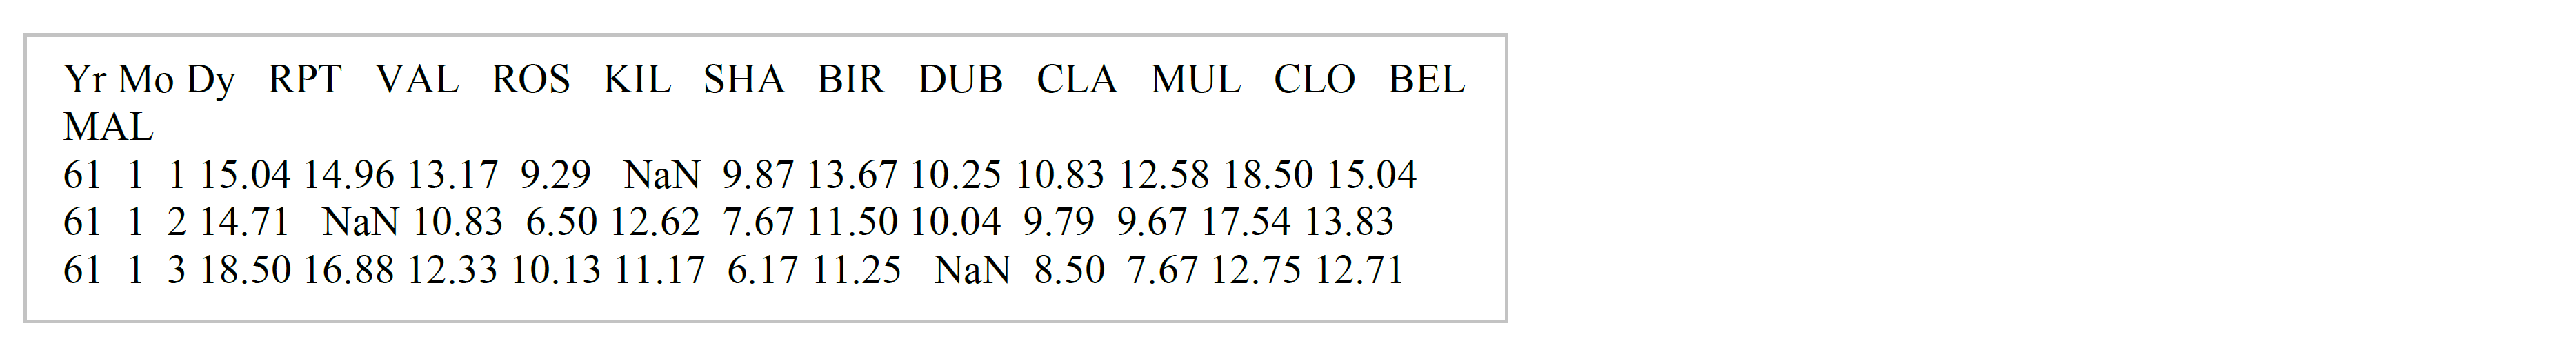

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

- Step 1. Import the necessary libraries<br>
- Step 2. Import the dataset from the attached file wind.txt<br>
- Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.<br>
- Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.<br>
- Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].<br>
- Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.<br>
- Step 7. Compute how many non-missing values there are in total.<br>
- Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times (A single number for the entire dataset). <br>
- Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days (A different set of numbers for each location). <br>
- Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day (A different set of numbers for each day).<br>
- Step 11. Find the average windspeed in January for each location (Treat January 1961 and January 1962 both as January).<br>
- Step 12. Downsample the record to a yearly frequency for each location.<br>
- Step 13. Downsample the record to a monthly frequency for each location.<br>
- Step 14. Downsample the record to a weekly frequency for each location.<br>
- Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.<br>


## Answer 4

#### Step 1 - 3. Import dataset, assign it to a variable called 'data', and replace the first 3 columns by a proper datetime index.

In [37]:
import pandas as pd

#import data, use white space as delimiter, and combine the first three columns into one date column
data = pd.read_csv('wind.txt', delimiter=r'\s+', parse_dates= {'date' : ['Yr','Mo','Dy']})

data

,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


#### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [38]:
import datetime as dt
from datetime import timedelta

#use the followiing lambda function to correct the date if it exceed today's date
data['date_corrected'] = data['date'].apply(lambda x: x - dt.timedelta(days=365*100) if x > dt.datetime.now() else x)
data = data.drop(columns = ['date'])

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_corrected
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-26
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-27
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-28
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-29
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-30


#### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [39]:
#Examine the date type of 'date_corrected'
print(data['date_corrected'].dtypes)

datetime64[ns]


In [40]:
#set 'date_corrected' as index
data.set_index('date_corrected', inplace = True)

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_corrected,,,,,,,,,,,,
1961-01-26,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-27,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-28,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-29,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-30,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 6. Compute how many values are missing for each location over the entire record (They should be ignored in all calculations below).

In [41]:
#Compute number of missing values in each columns

data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### Step 7. Compute how many non-missing values there are in total.

In [42]:
#Compute total number of non-missing values in the entire dataframe

import numpy as np

np.sum(data.count())

78857

#### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times (A single number for the entire dataset).

In [88]:
#Filtering out missing values from the entire dataset
filtered_data = data.dropna()

filtered_data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_corrected,,,,,,,,,,,,
1961-01-29,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-30,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-31,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-02-01,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-02-02,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [46]:
#Examine if there are missing values in 'filtered_data'
filtered_data.isna().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [49]:
#Calculate the mean windspeeds across entire dataframe

average_windspeeds = filtered_data.stack().mean()  #use 'stack()' to convert the dataframe into a single column

average_windspeeds

10.222465245951708

#### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days (A different set of numbers for each location).

In [51]:
loc_stats = filtered_data.describe().loc[['min','max','mean','std']]

loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


#### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day (A different set of numbers for each day).

In [54]:
day_stats = filtered_data.apply(pd.DataFrame.describe, axis=1).loc[:,['min','max','mean','std']]

day_stats

,min,max,mean,std
date_corrected,,,,
1961-01-29,1.79,11.75,6.619167,3.198126
1961-01-30,6.17,13.33,10.630000,2.445356
1961-01-31,4.42,13.21,8.240000,2.998063
1961-02-01,4.96,14.29,10.385000,3.072114
1961-02-02,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


#### Step 11. Find the average windspeed in January for each location (Treat January 1961 and January 1962 both as January).

In [72]:
#Group rows by month, and compute the monthly average
avg_m = filtered_data.groupby([filtered_data.index.month]).mean()

avg_m

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_corrected,,,,,,,,,,,,
1,14.598595,12.194991,13.393387,6.981676,11.362577,7.869748,11.862036,9.115189,9.585261,9.833946,14.483441,18.634432
2,14.256403,12.846324,12.820356,6.898577,11.527806,7.814150,11.152332,9.374921,9.210316,9.450534,13.859684,16.919644
3,13.580380,11.883834,13.281682,7.155280,11.551483,7.696166,11.191447,9.462025,9.336618,9.769096,13.649295,16.853363
4,12.983358,10.744422,12.498694,7.172724,11.152892,7.730821,11.056269,9.323190,9.444608,9.790466,13.514216,16.139198
5,12.171971,10.350824,11.668154,6.607634,10.542545,7.235305,9.473011,8.724158,8.489821,8.921541,12.748351,14.492025
6,10.985996,9.518994,10.991210,5.947542,9.800670,6.774674,8.325624,8.270894,7.771583,8.082495,12.576201,13.239088
7,10.207194,8.547446,9.748813,5.561835,9.412482,6.182590,8.086960,7.395162,7.666511,7.500000,11.868165,12.655629
8,9.582388,8.087415,9.469156,5.070251,8.564632,5.593375,7.347882,6.719031,7.078671,6.833609,10.940880,12.475440
9,11.458585,9.726965,10.744060,5.796574,9.877318,6.629330,8.818529,7.739516,7.848250,7.665680,12.285512,14.314004


In [73]:
#Display the average windspeed in January for each location
avg_Jan = avg_m.loc[1,:]

avg_Jan

RPT    14.598595
VAL    12.194991
ROS    13.393387
KIL     6.981676
SHA    11.362577
BIR     7.869748
DUB    11.862036
CLA     9.115189
MUL     9.585261
CLO     9.833946
BEL    14.483441
MAL    18.634432
Name: 1, dtype: float64

#### Step 12. Downsample the record to a yearly frequency for each location.

In [74]:
filtered_data_yr = filtered_data.resample('Y', convention='start').mean()

filtered_data_yr

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_corrected,,,,,,,,,,,,
1961-12-31,11.970857,10.049429,11.038190,6.824476,10.661333,7.548794,9.467683,8.705905,8.626857,9.735175,13.361365,13.709937
1962-12-31,12.149862,10.067597,11.692017,6.769586,10.541906,7.279365,10.812762,8.606768,8.092486,9.471050,12.689144,13.737928
1963-12-31,13.004438,10.961918,12.581342,7.540274,11.884082,8.601425,11.370575,10.450082,9.171041,10.410658,13.766877,15.354877
1964-12-31,12.297514,10.856448,12.047240,6.787213,11.505656,7.610410,10.173634,9.576557,7.756366,10.155492,13.699945,14.818087
1965-12-31,12.509863,11.070301,11.995973,6.847945,10.958219,7.446822,10.688548,8.863151,7.902932,9.937425,13.076795,15.747507
1966-12-31,13.367342,11.447151,12.063644,7.207945,11.572932,7.613589,10.316575,8.669890,8.250055,9.735041,13.974986,15.959699
1967-12-31,12.892959,11.242438,11.747836,7.266247,11.893726,7.643452,10.827836,9.448877,8.798110,9.692712,14.920877,17.131233
1968-12-31,11.838115,10.446694,11.333579,6.568251,10.888251,6.154454,9.050273,8.420000,7.341913,7.795437,13.043634,15.072787
1969-12-31,11.174521,9.670027,10.925973,5.819233,9.871808,6.025836,8.521863,7.588822,7.882767,7.860603,12.532795,15.891781


#### Step 13. Downsample the record to a monthly frequency for each location.

In [75]:
filtered_data_mon = filtered_data.resample('M', convention='start').mean()

filtered_data_mon

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_corrected,,,,,,,,,,,,
1961-01-31,12.373333,9.333333,11.043333,5.806667,6.873333,5.196667,10.406667,4.250000,7.973333,7.906667,8.833333,11.960000
1961-02-28,14.955000,12.111538,12.843077,6.843462,11.228462,8.350385,10.338846,8.751154,8.246538,9.347308,13.441538,13.884615
1961-03-31,15.380714,14.265000,14.182143,9.234286,13.210714,10.785714,11.276071,11.970714,11.650357,12.894643,18.478929,15.441429
1961-04-30,11.042593,10.653704,10.801481,6.958519,10.131481,8.686296,9.144074,9.101111,10.135556,10.331852,15.671111,15.272963
1961-05-31,11.218065,10.174194,10.343226,6.393871,9.256129,6.883871,7.481613,7.807742,7.785161,7.975806,11.781290,10.618387
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### Step 14. Downsample the record to a weekly frequency for each location.

In [78]:
filtered_data_wk = filtered_data.resample('W', convention='start').mean()

filtered_data_wk

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_corrected,,,,,,,,,,,,
1961-01-29,10.580000,6.630000,11.750000,4.580000,4.540000,2.880000,8.630000,1.790000,5.830000,5.880000,5.460000,10.880000
1961-02-05,12.504286,11.032857,10.917143,5.654286,9.540000,6.987143,10.435714,7.731429,8.137143,9.001429,13.421429,14.195714
1961-02-12,14.153333,9.428333,13.131667,5.230000,7.995000,5.870000,8.070000,6.886667,5.811667,7.493333,10.751667,9.695000
1961-02-19,13.375714,9.620000,13.448571,6.155714,10.494286,8.858571,9.661429,9.394286,7.381429,8.825714,11.845714,14.327143
1961-02-26,19.125000,16.535000,14.151667,10.848333,15.428333,11.780000,13.820000,11.013333,12.263333,12.770000,17.891667,18.695000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [94]:
describe_52wk = filtered_data.resample('W', convention='start').agg(['min','max','mean','std']).iloc[:52]

describe_52wk

RPT                                 VAL                    \
                  min    max       mean        std    min    max       mean   
date_corrected                                                                
1961-01-29      10.58  10.58  10.580000        NaN   6.63   6.63   6.630000   
1961-02-05      10.58  13.50  12.504286   1.225709   8.12  14.29  11.032857   
1961-02-12       9.04  19.75  14.153333   4.425606   3.54  14.37   9.428333   
1961-02-19       4.92  25.04  13.375714   6.418735   3.42  14.83   9.620000   
1961-02-26      12.21  24.37  19.125000   5.207002  11.42  20.79  16.535000   
1961-03-05      10.58  24.54  19.172857   5.233500   9.46  24.21  16.952857   
1961-03-12       6.04  22.50  16.617143   5.209193  11.54  19.70  14.541429   
1961-03-19       7.79  16.79  12.540000   3.177836   8.63  20.17  13.260000   
1961-03-26       8.71  25.80  17.286000   7.262009   7.08  21.50  15.166000   
1961-04-02       4.88  13.33   9.571429   3.259378   8.08  17.00  11.188571   
1961-04-09      10.63  14.79  11.971667   1.487998  10.17  16.96  13.738333   
1961-04-16       4.92  16.88  11.222857   4.563685   4.42  15.25  11.107143   
1961-04-23       5.88  18.25  10.245000   5.227890   2.58  16.29   8.848333   
1961-04-30       7.62  18.12  12.048333   4.323917   4.25  14.62   9.258333   
1961-05-07       4.50  13.37   9.042857   3.088234   4.83  12.25   9.254286   
1961-05-14       4.00  16.71   9.631429   5.205367   3.71  13.96   8.424286   
1961-05-21       8.17  21.09  13.811429   4.361672   5.66  15.41  11.062857   
1961-05-28       4.08  19.04  10.980000   5.291058   6.50  14.83  10.537143   
1961-06-04       4.79  23.00  12.182857   6.496860   3.96  19.79  11.201429   
1961-06-11       3.54  15.04   9.741667   3.699721   3.92  11.54   7.708333   
1961-06-18       4.88   6.83   5.576667   0.802961   3.58   5.96   4.458333   
1961-06-25       7.00  12.04   9.598333   1.922003   4.75  11.17   7.806667   
1961-07-02       7.50  15.92  10.720000   2.902683   6.34  11.54   8.591429   
1961-07-09       6.13  14.42   9.757143   2.743749   4.12  12.42   8.152857   
1961-07-16       4.00  14.33  10.250000   3.586080   3.25  14.54   8.924286   
1961-07-23       5.71  13.13   8.548571   2.404935   4.21  11.42   7.300000   
1961-07-30       7.21  17.50  12.718000   3.937756   4.96  10.75   8.074000   
1961-08-06       7.29  19.46  10.945000   4.471799   3.75  16.88   8.868333   
1961-08-13       4.25  22.50  13.055714   8.192775   3.08  19.29  10.250000   
1961-08-20       3.04  15.92   7.142857   4.880180   2.92  13.79   6.060000   
1961-08-27       6.13  16.08   9.544286   3.263116   4.83  10.41   7.225714   
1961-09-03       2.88  16.08  11.268571   4.432134   4.42  15.79   9.780000   
1961-09-10       6.63  15.34  12.015000   3.750116   6.71   9.13   7.960000   
1961-09-17       9.62  18.91  15.067143   3.413911   8.17  14.58  11.308571   
1961-09-24       3.63  14.46  11.012857   4.001020   4.67  22.00  12.948571   
1961-10-01       4.83  17.62   9.481429   4.656531   1.13  12.54   6.374286   
1961-10-08       5.00  20.75  12.005714   6.078547   3.92  18.66  11.007143   
1961-10-15       5.33  28.75  14.728333   9.259688   2.92  22.08  11.868333   
1961-10-22       6.92  18.46  10.615714   3.772222   6.04  13.62   9.672857   
1961-10-29       3.13  19.12  11.745000   6.492210   4.00  13.62   8.708333   
1961-11-05       9.75  17.12  14.397143   2.627767   3.63  16.96  11.471429   
1961-11-12       3.71  28.62  15.213333  10.684450   6.13  19.46  12.293333   
1961-11-19      10.46  25.04  17.646667   5.432597   3.75  18.88  12.590000   
1961-11-26       4.33  18.41  11.682857   5.141529   2.75  13.13   8.857143   
1961-12-03       5.46  15.79  10.000000   3.868074   3.96  13.46   7.844286   
1961-12-10       7.71  16.08  11.714286   3.492615   5.50  13.00   8.947143   
1961-12-17       6.46  14.29  10.417143   2.997809   3.29   9.33   5.581429   
1961-12-24       5.75  15.67   9.793333   3.426308   4.67  15.67   9

## Question 5

- Step 1. Import the necessary libraries
- Step 2. Import the dataset from this address(https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).
- Step 3. Assign it to a variable called chipo.
- Step 4. See the first 10 entries
- Step 5. What is the number of observations in the dataset?
- Step 6. What is the number of columns in the dataset?
- Step 7. Print the name of all the columns.
- Step 8. How is the dataset indexed?
- Step 9. Which was the most-ordered item?
- Step 10. For the most-ordered item, how many items were ordered?
- Step 11. What was the most ordered item in the choice_description column?
- Step 12. How many items were orderd in total?
- Step 13.
- -- Turn the item price into a float
- -- Check the item price type
- -- Create a lambda function and change the type of item price
- -- Check the item price type
- Step 14. How much was the revenue for the period in the dataset?
- Step 15. How many orders were made in the period?
- Step 16. What is the average revenue amount per order?
- Step 17. How many different items are sold?

## Answer 5

#### Step 1 - 4 Import data, name dataframe, and display the first 10 rows

In [114]:
import pandas as pd

#import data from the designated address and assign it to a variable called 'chipo'
#the original data is separated by '\t'
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')


chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5. What is the number of observations in the dataset?

In [3]:
q5_count_rows = chipo.shape[0]  #set the parameter inside 'shape' as '0' to count the number of rows
                               
q5_count_rows

4622

#### Step 6. What is the number of columns in the dataset?

In [4]:
q5_count_columns = chipo.shape[1]  #set the parameter inside 'shape' as '1' to count the number of columns
                               
q5_count_columns

5

#### Step 7. Print the name of all the columns.

In [5]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Step 8. How is the dataset indexed?

In [6]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9 - 10. Which was the most-ordered item? How many quantity?

In [27]:
chipo_9 = chipo.groupby('item_name').sum()
chipo_9 = chipo_9.drop(columns = ['order_id'])

chipo_9.loc[chipo_9['quantity'].idxmax()]

quantity    761
Name: Chicken Bowl, dtype: int64

#### Step 11. What was the most ordered item in the choice_description column?

In [119]:
#Split strings in 'choice_description' column
#only extract the string (item name) before the fist ',' and assign to a new column named 'choice_description_item'

chipo['choice_description_item']= chipo['choice_description'].str.partition(',')[0]

#remove '[]' from 'choice_description_item'
chipo['choice_description_item'] = chipo['choice_description_item'].str.replace("[", "", regex = True)
chipo['choice_description_item'] = chipo['choice_description_item'].str.replace("]", "", regex = True)

chipo['choice_description_item']

0                                   NaN
1                            Clementine
2                                 Apple
3                                   NaN
4       Tomatillo-Red Chili Salsa (Hot)
                     ...               
4617                 Fresh Tomato Salsa
4618                 Fresh Tomato Salsa
4619                 Fresh Tomato Salsa
4620                 Fresh Tomato Salsa
4621                 Fresh Tomato Salsa
Name: choice_description_item, Length: 4622, dtype: object

In [129]:
#Count total quantity by 'choice_description_item'
chipo_11 = chipo.groupby('choice_description_item').sum()
chipo_11 = chipo_11.drop(columns = ['order_id'])

#Display the item with the highest quantity
chipo_11.loc[chipo_11['quantity'].idxmax()]

quantity    1112
Name: Fresh Tomato Salsa, dtype: int64

#### Step 12. How many items were orderd in total?

In [12]:
chipo_12 = chipo['quantity']

chipo_12.sum()

4972

#### Step 13.
- Turn the item price into a float
- Check the item price type
- Create a lambda function and change the type of item price
- Check the item price type

In [46]:
#Remove white space and '$', then turn 'item price' into float data type

chipo_13 = chipo
chipo_13['item_price'] = chipo_13['item_price'].str.strip()
chipo_13['item_price'] = chipo_13['item_price'].str.replace('$','', regex=True).astype(float)

chipo_13.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [47]:
#Check the item price type

print(chipo_13['item_price'].dtypes)

float64


In [52]:
#Use lambda function to change the type of item price from 'float' to 'int'

chipo_13['item_price'] = chipo_13['item_price'].apply(lambda x: int(x) if isinstance(x, float) else x)

In [53]:
#Check the item price type

print(chipo_13['item_price'].dtypes)

int64


#### Step 14. How much was the revenue for the period in the dataset?

In [55]:
Revenue = (chipo_13['item_price']*chipo_13['quantity']).sum()

Revenue

36616

#### Step 15. How many orders were made in the period?

In [60]:
chipo_15 = chipo_13.groupby('order_id').count()

n_order = chipo_15.shape[0]

n_order

1834

#### Step 16. What is the average revenue amount per order?

In [62]:
average_revenue = Revenue/n_order

average_revenue.round(decimals=2)

19.97

#### Step 17. How many different items are sold?

In [63]:
n_unique_items = len(pd.unique(chipo['item_name']))

n_unique_items

50

## Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

## Answer 6

In [82]:
import pandas as pd

data_q6 = pd.read_csv('us-marriages-divorces-1867-2014.csv')

data_q6.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [83]:
#Filter dataframe for further visualization purpose

df_m = data_q6.loc[:,['Year', 'Marriages_per_1000']]
df_m['Type'] = 'Marriages'
df_m['Number_per_1000'] = df_m['Marriages_per_1000']
df_m = df_m.drop(columns=['Marriages_per_1000'])

df_d = data_q6.loc[:,['Year', 'Divorces_per_1000']]
df_d['Type'] = 'Divorces'
df_d['Number_per_1000'] = df_d['Divorces_per_1000']
df_d = df_d.drop(columns=['Divorces_per_1000'])

print(df_m)
print(df_d)

     Year       Type  Number_per_1000
0    1867  Marriages              9.7
1    1868  Marriages              9.1
2    1869  Marriages              9.0
3    1870  Marriages              8.8
4    1871  Marriages              8.8
..    ...        ...              ...
140  2007  Marriages              7.3
141  2008  Marriages              7.1
142  2009  Marriages              6.8
143  2010  Marriages              6.8
144  2011  Marriages              6.8

[145 rows x 3 columns]
     Year      Type  Number_per_1000
0    1867  Divorces              0.3
1    1868  Divorces              0.3
2    1869  Divorces              0.3
3    1870  Divorces              0.3
4    1871  Divorces              0.3
..    ...       ...              ...
140  2007  Divorces              2.8
141  2008  Divorces              2.8
142  2009  Divorces              2.7
143  2010  Divorces              2.8
144  2011  Divorces              2.8

[145 rows x 3 columns]


In [84]:
#Organize dataframe for further visualization purpose

data_q6_new = pd.concat([df_m,df_d],axis=0) #set up 'axis=0' so that three series will be joined by rows

data_q6_new = data_q6_new.reset_index(drop=True)

data_q6_new

,Year,Type,Number_per_1000
0,1867,Marriages,9.7
1,1868,Marriages,9.1
2,1869,Marriages,9.0
3,1870,Marriages,8.8
4,1871,Marriages,8.8
...,...,...,...
285,2007,Divorces,2.8
286,2008,Divorces,2.8
287,2009,Divorces,2.7
288,2010,Divorces,2.8


[Text(0.5, 1.0, 'The number of marriages and divorces per capita in the U.S. between 1867 and 2014')]

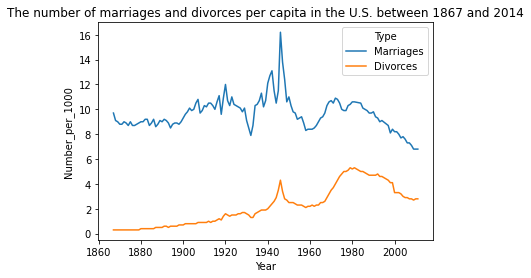

In [85]:
import seaborn as sns

visual_q6 = sns.lineplot(x = "Year", y = "Number_per_1000", hue="Type", data = data_q6_new)
visual_q6.set(title='The number of marriages and divorces per capita in the U.S. between 1867 and 2014')

## Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!

## Answer 7

In [86]:
#set 'year' as index

data_q7 = data_q6_new.set_index('Year')
data_q7['Year'] = data_q7.index
data_q7 = data_q7.loc[[1900, 1950, 2000],['Year','Type', 'Number_per_1000']]

data_q7

,Year,Type,Number_per_1000
Year,,,
1900,1900,Marriages,9.3
1900,1900,Divorces,0.7
1950,1950,Marriages,11.0
1950,1950,Divorces,2.5
2000,2000,Marriages,8.2
2000,2000,Divorces,3.3


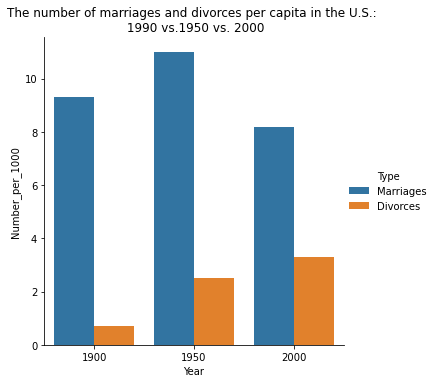

In [88]:
import seaborn as sns

visual_q7 = sns.catplot(x = "Year",       # x variable name
            y = "Number_per_1000",       # y variable name
            hue = "Type",  # group variable name
            data = data_q7,    
            kind = "bar")

visual_q7.set(title='The number of marriages and divorces per capita in the U.S.: \n 1990 vs.1950 vs. 2000')

## Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

## Answer 8

In [1]:
import pandas as pd

data_q8 = pd.read_csv('actor_kill_counts.csv')

data_q8.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


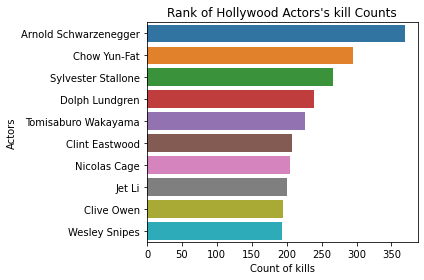

In [16]:
import seaborn as sns

# set up figure size
plt.figure(figsize=(6,4))

# set up x and y axises
sns.barplot(x = 'Count',
            y = "Actor", 
            data = data_q8, 
            order=data_q8.sort_values('Count',ascending = False).Actor)

# set up labels and chart title
plt.xlabel("Count of kills", size=10)
plt.ylabel("Actors", size=10)
plt.title("Rank of Hollywood Actors's kill Counts", size=12)
plt.tight_layout()


## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

## Answer 9

In [63]:
import pandas as pd

data_q9 = pd.read_csv('roman-emperor-reigns.csv')

data_q9.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [65]:
#Group dataframe by Cause_of_Death and organize dataframe for visualization purpose

data_q9_1 = data_q9.groupby('Cause_of_Death').count()
data_q9_1['Count_of_Emperor'] = data_q9_1['Emperor']
data_q9_1 = data_q9_1.drop(columns=['Length_of_Reign','Emperor'])

data_q9_1

,Count_of_Emperor
Cause_of_Death,
Assassinated,22
Died in captivity,1
Executed,3
Illness,5
Killed in battle,8
Natural causes,16
Possibly assassinated,8
Suicide,5


array([<AxesSubplot:>], dtype=object)

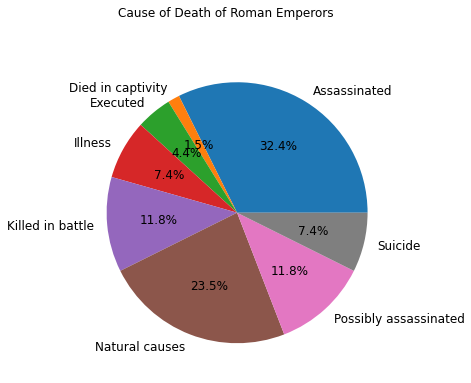

In [79]:
data_q9_1.plot.pie(autopct="%.1f%%",subplots=True, legend=False,figsize=(12,6), fontsize=12,  ylabel='', title='Cause of Death of Roman Emperors',)


## Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year.

## Answer 10

In [69]:
import pandas as pd

data_q10 = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

data_q10.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


[Text(0.5, 1.0, 'The relationship between the total revenue earned by arcades and the number of \n Computer Science PhDs awarded in the U.S. between 2000 and 2009')]

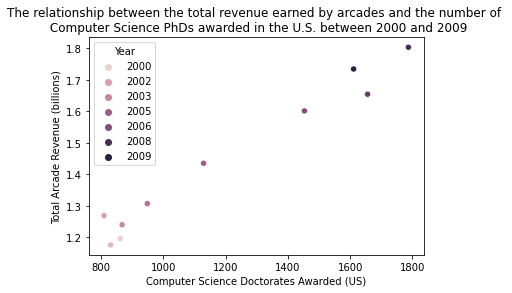

In [75]:
import seaborn as sns

visual_q10 = sns.scatterplot(x='Computer Science Doctorates Awarded (US)', y='Total Arcade Revenue (billions)', hue='Year', data=data_q10)
visual_q10.set(title='The relationship between the total revenue earned by arcades and the number of \n Computer Science PhDs awarded in the U.S. between 2000 and 2009')